In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

**Loading and Preparing Data**

In [6]:
file_path = '/content/drive/MyDrive/cybersecurity_attacks.csv'
data = pd.read_csv(file_path)

In [7]:
numerical_features = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
data_numerical = data[numerical_features]

In [8]:
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numerical)

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

**Model training**

In [10]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
anomaly_labels = isolation_forest.fit_predict(data_scaled)

In [11]:
anomaly_labels = pd.Series(anomaly_labels).map({1: 0, -1: 1})

In [12]:
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_features)
data_scaled_df['Anomaly'] = anomaly_labels

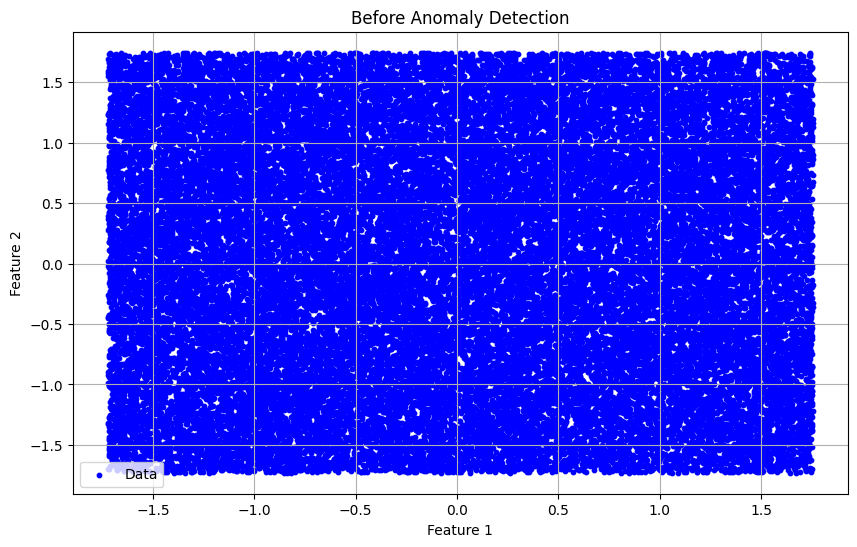

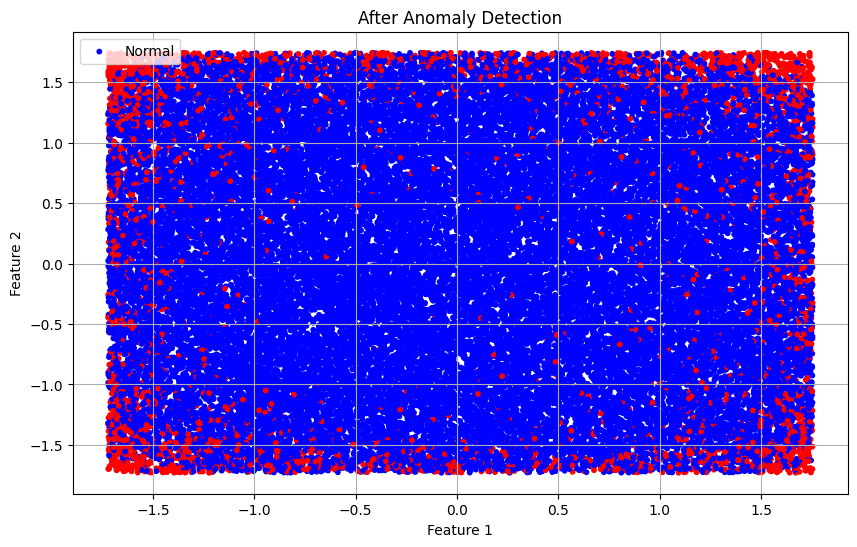

In [13]:
def visualize_data(data, labels=None, title="Data Visualization", is_scaled=True):
    plt.figure(figsize=(10, 6))
    if labels is None:
        plt.scatter(data[:, 0], data[:, 1], c='blue', s=10, label='Data')
    else:
        colors = np.array(['blue', 'red'])  # Normal: blue, Anomalies: red
        plt.scatter(data[:, 0], data[:, 1], c=colors[labels], s=10)
    plt.title(title)
    plt.xlabel('Feature 1' if is_scaled else numerical_features[0])
    plt.ylabel('Feature 2' if is_scaled else numerical_features[1])
    plt.legend(['Normal', 'Anomaly'] if labels is not None else ['Data'])
    plt.grid(True)
    plt.show()

# Visualize before anomaly detection
visualize_data(data_scaled, title="Before Anomaly Detection")

# Visualize after anomaly detection
visualize_data(data_scaled, anomaly_labels, title="After Anomaly Detection")

In [16]:
# Extract anomalies
anomalies = data[data_scaled_df['Anomaly'] == 1]

# Save anomalies to a CSV file
anomalies_file_path = '/content/drive/MyDrive/extracted_anomalies.csv'
anomalies.to_csv(anomalies_file_path, index=False)